El problema de la Braquistócrona (Braquistos = el mas breve y Cronos = tiempo) da origen al cálculo de variaciones. En 1696, Jean Bernoulli retó a los matemáticos del mundo con la siguiente pregunta: Dados dos puntos A,B en un plano vertical. Encontrar el camino que una partícula debe recorrer para minimizar el tiempo de viaje. La longitud de una curva que une $P_1=(x_1,y_1$ y $P_2=(x_2,y_2)$ viene dada por:
<img src=https://labellephysique.files.wordpress.com/2018/09/levibrachis.jpg>
  En el punto $P_1$ se tiene que $E=T+U=0$ y en cualquier otro punto $P=(a,b)$ se tiene que $E=T+U=\frac{1}{2}mv^2+mgh$.   
    De la cual resulta que:  
      $v=\sqrt{-2gy}$    
        dado que $v=\frac{ds}{dt}$$\rightarrow$$ds=\sqrt{dx^2+dy^2}$  
          Como el problema trata de minimizar el tiempo de traslación obtendremos una función a la cual aplicaremos la fórmula integrada de la ecuacion de Euler:  
            $f=\sqrt{\frac{-1+y'^2}{2gy}}$  
            $f-y'\frac{\partial f}{\partial y'}=c$  
            Llegaremos a una integral de la siguiente forma:  
            $x=\pm\int\sqrt{\frac{1}{-\frac{1}{2gc^2y}-1}dy}$  
    Al resolver la integral obtendremos dos ecuaciones parametricas las cuales son:
    $x=\frac{1}{4gc^2}(\chi-\sin{\chi})$, $y=-\frac{1}{4gc^2}(1-\cos{\chi})$, donde $\chi$ es nuestro parametro y $c$ una constante que aparece al resolver el problema.  
  Esta constante podemos calcularla a partir de la siguiente ecuación:  
    $\arccos({1-4gc^2h})=2c\sqrt{2gh(1-2gc^2h)+2gcd}$    
    Donde $g$ es el valor de la gravedad, $d=x_2$ y $h=y_2$.  
      La cual es una ecuación trascendental, el valor de c se tiene que obtener númericamente, para esto procedemos a aplicar el método de Newton-Rhapson.

In [119]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

# Variables simbólicas
c, r = sy.symbols('c, r')

# Constantes dadas
h = 1
d = 3
g = 9.81

def bra(c):
    return sy.acos(1-4*h*g*c**2*h)-2*c*(sy.sqrt(2*g*h*(1-2*g*c**2*h)+2*g*c*d))
print ('Nuestra ecuación es:')
display(bra(c))
U=bra(c)

# Función que necesitamos resolver para c
def bra(c):
    return sy.acos(1 - 4 * h * g * c**2 * h) - 2 * c * (sy.sqrt(2 * g * h * (1 - 2 * g * c**2 * h) + 2 * g * c * d))

print ('La derivada de nuestra ecuación')
Y=sy.diff(bra(c),c)
display(Y)
# Derivada de la función respecto a c
Y = sy.diff(bra(c), c)

#dado que con nuestras condiciones no podemos definir un valor inicial para c, proponemos uno
c0=0.0001
#Este se obtuvo al meter nuestra ecuacion a Wolfram para observar un punto aproximado donde corta al eje x

#definimos una tolerancia porque queremos que el error sea  minimo
t = 0.001

# Método de Newton-Raphson
while True:
    c1 = c0 - bra(c0) / Y.subs(c, c0)
    if abs(c1 - c0) < t:
        break
    c0 = c1

print("La solución aproximada para c es:")
display(c1)
print('Para comprobar el valor obtenido de nuestra raíz, la evaluamos en nuestra ecuación')
display(bra(c1))
print('El cual es un valor muy pequeño, por lo que podemos decir que es una buena elección de punto inicial')


Nuestra ecuación es:


-39.24*c*sqrt(-c**2 + 0.152905198776758*c + 0.0509683995922528) + acos(1 - 39.24*c**2)

La derivada de nuestra ecuación


-39.24*c*(0.0764525993883792 - c)/sqrt(-c**2 + 0.152905198776758*c + 0.0509683995922528) + 2.0*c/sqrt(0.000649444439248889 - (0.0254841997961264 - c**2)**2) - 39.24*sqrt(-c**2 + 0.152905198776758*c + 0.0509683995922528)

La solución aproximada para c es:


4.99763302194674e-5

Para comprobar el valor obtenido de nuestra raíz, la evaluamos en nuestra ecuación


-3.31737673922171e-8

El cual es un valor muy pequeño, por lo que podemos decir que es una buena elección de punto inicial


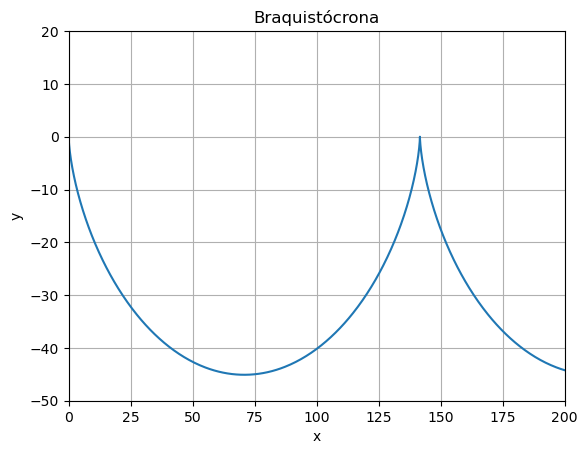

In [115]:
# Valor de c obtenido
c_2 = 4.99*np.exp(-5) 

# Funciones paramétricas de la braquistócrona
def x(r):
    return (1 / (4 * g * c_2**2)) * (r - np.sin(r))

def y(r):
    return -(1 / (4 * g * c_2**2)) * (1 - np.cos(r))

# Valores de r para el rango deseado
r_v = np.linspace(0, 1000, 100000)  

# Calcula las coordenadas x y y para cada valor de r
x_v = x(r_v)
y_v = y(r_v)

# Grafica la braquistócrona
plt.plot(x_v, y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Braquistócrona')
plt.grid(True)
plt.xlim(0, 200)
plt.ylim(-50, 20)
plt.show()

Se puede observar que coincide con el patron de la formación de una cicloide, pues una braquistócrona es una cicloide invertida
<img src=https://upload.wikimedia.org/wikipedia/commons/6/69/Cycloid_f.gif>